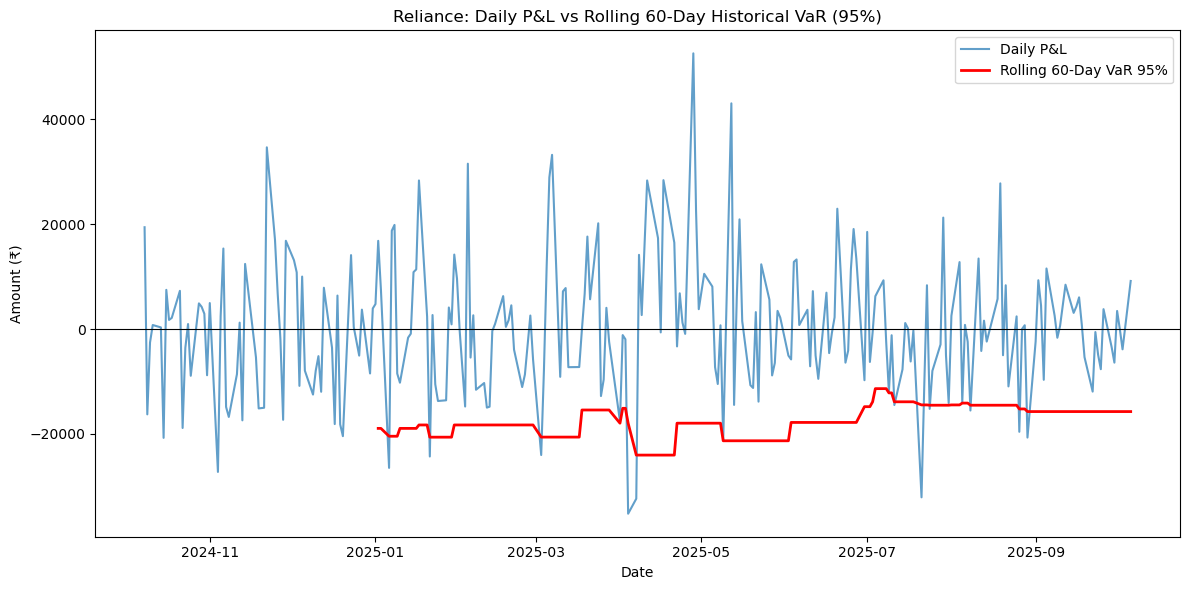

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== Parameters =====
ticker = "RELIANCE.NS"
portfolio_value = 1_000_000   # INR
alpha = 0.95
window = 60                   # 60-day rolling VaR
# =======================

# 1. Download Reliance daily prices (last 1 year)
px = yf.download(ticker, period="1y", interval="1d", auto_adjust=True, progress=False)["Close"]

# 2. Calculate returns and daily P&L
returns = px.pct_change().dropna()
pnl = returns * portfolio_value

# 3. Rolling Historical VaR
rolling_var = pnl.rolling(window).apply(
    lambda x: -np.percentile(x, (1-alpha)*100), raw=False
)

# 4. Plot
plt.figure(figsize=(12,6))
plt.plot(pnl.index, pnl.values, label="Daily P&L", alpha=0.7)
plt.plot(rolling_var.index, -rolling_var.values,
         label=f"Rolling {window}-Day VaR {int(alpha*100)}%", color="red", linewidth=2)
plt.axhline(0, color="black", linewidth=0.8)

plt.title("Reliance: Daily P&L vs Rolling 60-Day Historical VaR (95%)")
plt.xlabel("Date")
plt.ylabel("Amount (₹)")
plt.legend()
plt.tight_layout()
plt.show()
